In [17]:
import os 
os.environ['MONOTOOLSPATH']='/Volumes/LUVOIR/MonoToolsData'

import pickle
import numpy as np
import pandas as pd

from MonoTools import tools,search,starpars

from astropy.coordinates import SkyCoord
import astropy.units as u

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import glob
infofiles=glob.glob("/Volumes/LUVOIR/MonoToolsData/*_CandMonoInfo.csv")
for file in infofiles:
     os.system("mv "+file+" "+"/".join(file.split("/")[:-1])+"/"+file.split("/")[-1].split("_")[0]+"/"+file.split("/")[-1])

In [24]:
cands=pd.read_csv("data/tables/2020_monos_unq.csv").iloc[::2]

In [ ]:
for ix,dat in cands.iterrows():
    try:
        file_loc=tools.MonoData_savepath+'/'+tools.id_dic[dat['mission']]+str(int(dat['id'])).zfill(11)
        if not os.path.isdir(file_loc):
            os.system('mkdir '+file_loc)
        file_prefix=file_loc+"/"+tools.id_dic[dat['mission']]+str(int(dat['id'])).zfill(11)
        if not os.path.exists(file_prefix+"_CandMonoInfo.csv"):
            if not pd.isnull(dat['ra']):
                radec=SkyCoord(float(dat['ra'])*u.deg,float(dat['dec'])*u.deg)
            else:
                radec=None
            #loading Rstar,Tess, logg and rho from csvs:
            if not os.path.isfile(file_prefix+'_starpars.csv'):
                info,_,_=starpars.getStellarInfoFromCsv(int(dat['id']),dat['mission'],radec=radec)
                info.to_csv(file_prefix+'_starpars.csv')
            else:
                #print("loading from ",file_prefix+'_starpars.csv')
                info=pd.read_csv(file_prefix+'_starpars.csv', index_col=0, header=0).T.iloc[0]
            if 'ra' in info.index and radec is None:
                radec=SkyCoord(float(info['ra'])*u.deg,float(info['dec'])*u.deg)
            Rstar=[float(info['rad']),float(info['eneg_rad']),float(info['epos_rad'])]
            Teff=[float(info['teff']),float(info['eneg_teff']),float(info['epos_teff'])]
            logg=[float(info['logg']),float(info['eneg_logg']),float(info['epos_logg'])]
            rhostar=[float(info['rho']),float(info['eneg_rho']),float(info['epos_rho'])]
            FeH=0.0 if 'FeH' not in info else float(info['FeH'])
            if 'mass' in info:
                Ms=float(info['mass'])
            else:
                Ms=rhostar[0]*Rstar[0]**3

            if not os.path.isfile(file_prefix+'_lc.pickle'):
                #Gets Lightcurve
                lc,hdr=tools.openLightCurve(int(dat['id']),dat['mission'],coor=radec,use_ppt=False)
                pickle.dump(lc,open(file_prefix+'_lc.pickle','wb'))
                #lc=lcFlatten(lc,winsize=9*tdur,stepsize=0.1*tdur)
            else:
                lc=pickle.load(open(file_prefix+'_lc.pickle','rb'))

            cand={'00':{'tcen':dat['tcen']-(7000-4833),'tdur':dat['dur'],'orbit_flag':'mono'}}    
            cand, fig = search.VetCand(cand['00'],'00',dat['id'],lc,Rs=Rstar[0],Ms=Ms,Teff=Teff[0],
                                       file_loc=file_loc,plot=True,vet_do_fit=True)
            floatvars=[var for var in cand if type(cand[var]) in [int,float,str,np.float64,np.float32]]
            df=pd.Series({var:cand[var] for var in floatvars},name=tools.id_dic[dat['mission']]+str(int(dat['id'])))
            df.to_csv(file_prefix+"_CandMonoInfo.csv")
        else:
            print("Already processed",dat)
    except:
        print("NO JUICE",dat)

Already processed Unnamed: 0                                         0
dec                                              NaN
dur                                         0.716957
file          DFM_Kepler_lower_vetting_threshold.csv
id                                       1.03213e+07
mission                                       Kepler
ra                                               NaN
tcen                                          554.32
Name: 0, dtype: object
Already processed Unnamed: 0                                         2
dec                                              NaN
dur                                         0.768466
file          DFM_Kepler_lower_vetting_threshold.csv
id                                       1.01973e+07
mission                                       Kepler
ra                                               NaN
tcen                                         1325.53
Name: 2, dtype: object
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu

100%|██████████| 1241/1241 [00:13<00:00, 94.90it/s]


80 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00272840024 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=296.821665568538&dec=47.3540046027107&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:13<00:00, 85.98it/s]


74 points masked in lc of 1197
[0, 1]
Kepler file
7 points masked in lc of 476
Kepler file
17 points masked in lc of 1639
Kepler file
294 points masked in lc of 4354
Kepler file
242 points masked in lc of 4370
Kepler file
304 points masked in lc of 4397
Kepler file
159 points masked in lc of 4634
Kepler file
131 points masked in lc of 4398
Kepler file
178 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
140 points masked in lc of 4573
Kepler file
510 points masked in lc of 4044
Kepler file
191 points masked in lc of 4421
Kepler file
501 points masked in lc of 4757
Kepler file
684 points masked in lc of 4203
Kepler file
275 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1]
transit mask: <class 'numpy.ndarray'> 55952 1 <class 'numpy.ndarray'> 55952 True


INFO (theano.gof.compilelock): Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


INFO  [theano.gof.compilelock._get_lock()]: Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


INFO (theano.gof.compilelock): Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


INFO  [theano.gof.compilelock._get_lock()]: Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock
00 - Checks complete.  SNR: 21.85551  SNR_r: 44.36963  variability: -224.132  centroid: 9.738697 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
10602068  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 

100%|██████████| 1241/1241 [00:14<00:00, 87.51it/s]


82 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00063291922 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=292.697874478511&dec=47.8811272992951&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:14<00:00, 83.67it/s]


75 points masked in lc of 1197
[0, 1]
Kepler file
16 points masked in lc of 1639
Kepler file
295 points masked in lc of 4354
Kepler file
250 points masked in lc of 4370
Kepler file
298 points masked in lc of 4397
Kepler file
159 points masked in lc of 4634
Kepler file
140 points masked in lc of 4398
Kepler file
161 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
151 points masked in lc of 4573
Kepler file
290 points masked in lc of 4754
Kepler file
508 points masked in lc of 4044
Kepler file
190 points masked in lc of 4421
Kepler file
501 points masked in lc of 4757
Kepler file
423 points masked in lc of 4780
Kepler file
679 points masked in lc of 4203
Kepler file
277 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68826 1 <class 'numpy.ndarray'> 68826 True


INFO (theano.gof.compilelock): Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


INFO  [theano.gof.compilelock._get_lock()]: Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


WARNING (theano.gof.compilelock): Refreshing lock failed, we release the lock before raising again the exception


WARNING [theano.gof.compilelock.refresh_lock()]: Refreshing lock failed, we release the lock before raising again the exception
NO JUICE Unnamed: 0                                         6
dec                                              NaN
dur                                         0.531201
file          DFM_Kepler_lower_vetting_threshold.csv
id                                       1.06021e+07
mission                                       Kepler
ra                                               NaN
tcen                                         830.825
Name: 6, dtype: object
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
10842718  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._make_request()]: https://mast

100%|██████████| 1241/1241 [00:15<00:00, 81.77it/s]


85 points masked in lc of 1241
Kepler file
20 points masked in lc of 1639
Kepler file
299 points masked in lc of 4354
Kepler file
247 points masked in lc of 4370
Kepler file
297 points masked in lc of 4397
Kepler file
157 points masked in lc of 4634
Kepler file
140 points masked in lc of 4398
Kepler file
161 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
167 points masked in lc of 4768
Kepler file
141 points masked in lc of 4573
Kepler file
291 points masked in lc of 4754
Kepler file
502 points masked in lc of 4044
Kepler file
187 points masked in lc of 4421
Kepler file
500 points masked in lc of 4757
Kepler file
418 points masked in lc of 4780
Kepler file
674 points masked in lc of 4203
Kepler file
275 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67629 1 <class 'numpy.ndarray'> 67629 True
00 variability. LogLik= 144.95000524243846
00 - Checks complete.  SNR: 95.7

100%|██████████| 1241/1241 [00:15<00:00, 80.28it/s]


131 points masked in lc of 1241
Kepler file
20 points masked in lc of 1639
Kepler file
294 points masked in lc of 4354
Kepler file
244 points masked in lc of 4370
Kepler file
295 points masked in lc of 4397
Kepler file
159 points masked in lc of 4634
Kepler file
131 points masked in lc of 4398
Kepler file
152 points masked in lc of 4375
Kepler file
180 points masked in lc of 3279
Kepler file
176 points masked in lc of 4768
Kepler file
143 points masked in lc of 4573
Kepler file
288 points masked in lc of 4754
Kepler file
505 points masked in lc of 4044
Kepler file
193 points masked in lc of 4421
Kepler file
495 points masked in lc of 4757
Kepler file
421 points masked in lc of 4780
Kepler file
673 points masked in lc of 4203
Kepler file
280 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67629 1 <class 'numpy.ndarray'> 67629 True
00 - Checks complete.  SNR: 28.66029  SNR_r: 56.89089  variability: -1318.

100%|██████████| 1241/1241 [00:15<00:00, 81.79it/s]


82 points masked in lc of 1241
Kepler file
25 points masked in lc of 1639
Kepler file
297 points masked in lc of 4354
Kepler file
247 points masked in lc of 4370
Kepler file
305 points masked in lc of 4397
Kepler file
158 points masked in lc of 4634
Kepler file
136 points masked in lc of 4398
Kepler file
157 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
170 points masked in lc of 4768
Kepler file
139 points masked in lc of 4573
Kepler file
296 points masked in lc of 4754
Kepler file
507 points masked in lc of 4044
Kepler file
193 points masked in lc of 4421
Kepler file
498 points masked in lc of 4757
Kepler file
422 points masked in lc of 4780
Kepler file
673 points masked in lc of 4203
Kepler file
276 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67629 1 <class 'numpy.ndarray'> 67629 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 step. LogLik= 13960.144885789716
00 variability. LogLik= 12266.94592959826
00 - Checks complete.  SNR: 28.88433  SNR_r: 9.235361  variability: 12266.94  centroid: 12.47851 | flag: variability
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Already processed Unnamed: 0                                        18
dec                                              NaN
dur                                         0.255486
file          DFM_Kepler_lower_vetting_thres

100%|██████████| 1241/1241 [00:18<00:00, 67.91it/s]


81 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00271766569 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=295.628372800638&dec=43.7571522037896&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:22<00:00, 52.19it/s]


74 points masked in lc of 1197
[0, 1]
Kepler file
21 points masked in lc of 1639
Kepler file
293 points masked in lc of 4354
Kepler file
242 points masked in lc of 4370
Kepler file
298 points masked in lc of 4397
Kepler file
157 points masked in lc of 4634
Kepler file
135 points masked in lc of 4398
Kepler file
161 points masked in lc of 4375
Kepler file
180 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
136 points masked in lc of 4573
Kepler file
294 points masked in lc of 4754
Kepler file
501 points masked in lc of 4044
Kepler file
197 points masked in lc of 4421
Kepler file
494 points masked in lc of 4757
Kepler file
425 points masked in lc of 4780
Kepler file
679 points masked in lc of 4203
Kepler file
272 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68826 1 <class 'numpy.ndarray'> 68826 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
NO JUICE Unnamed: 0                                        20
dec                                              NaN
dur                                          1.23064
file          DFM_Kepler_lower_vetting_threshold.csv
id                                       7.97136e+06
mission                                       Kepler
ra                                               NaN
tcen                                          675.77
Name: 18, dtype: object
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
8410697  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connecti

100%|██████████| 1241/1241 [00:22<00:00, 55.86it/s]


82 points masked in lc of 1241
Kepler file
7 points masked in lc of 476
Kepler file
23 points masked in lc of 1639
Kepler file
298 points masked in lc of 4354
Kepler file
244 points masked in lc of 4370
Kepler file
299 points masked in lc of 4397
Kepler file
162 points masked in lc of 4634
Kepler file
146 points masked in lc of 4398
Kepler file
158 points masked in lc of 4375
Kepler file
184 points masked in lc of 3279
Kepler file
168 points masked in lc of 4768
Kepler file
150 points masked in lc of 4573
Kepler file
287 points masked in lc of 4754
Kepler file
499 points masked in lc of 4044
Kepler file
193 points masked in lc of 4421
Kepler file
498 points masked in lc of 4757
Kepler file
422 points masked in lc of 4780
Kepler file
689 points masked in lc of 4203
Kepler file
278 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68105 1 <class 'numpy.ndarray'> 68105 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 33.63046  SNR_r: 91.09670  variability: -6378.42  centroid: 11.19554 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
8800954  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:19<00:00, 64.39it/s]


93 points masked in lc of 1241
Kepler file
9 points masked in lc of 476
Kepler file
18 points masked in lc of 1639
Kepler file
301 points masked in lc of 4354
Kepler file
251 points masked in lc of 4370
Kepler file
295 points masked in lc of 4397
Kepler file
166 points masked in lc of 4634
Kepler file
138 points masked in lc of 4398
Kepler file
162 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
173 points masked in lc of 4768
Kepler file
139 points masked in lc of 4573
Kepler file
290 points masked in lc of 4754
Kepler file
505 points masked in lc of 4044
Kepler file
200 points masked in lc of 4421
Kepler file
506 points masked in lc of 4757
Kepler file
420 points masked in lc of 4780
Kepler file
673 points masked in lc of 4203
Kepler file
277 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68105 1 <class 'numpy.ndarray'> 68105 True
00 - Checks complete.  SNR: 37

100%|██████████| 1241/1241 [00:15<00:00, 79.00it/s]


80 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00239287236 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=300.246866325296&dec=45.7804208728218&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:15<00:00, 78.50it/s]


74 points masked in lc of 1197
[0, 1]
Kepler file
291 points masked in lc of 4354
Kepler file
246 points masked in lc of 4370
Kepler file
295 points masked in lc of 4397
Kepler file
154 points masked in lc of 4634
Kepler file
138 points masked in lc of 4398
Kepler file
159 points masked in lc of 4375
Kepler file
186 points masked in lc of 3279
Kepler file
163 points masked in lc of 4768
Kepler file
142 points masked in lc of 4573
Kepler file
290 points masked in lc of 4754
Kepler file
503 points masked in lc of 4044
Kepler file
189 points masked in lc of 4421
Kepler file
495 points masked in lc of 4757
Kepler file
422 points masked in lc of 4780
Kepler file
682 points masked in lc of 4203
Kepler file
273 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67187 0 <class 'numpy.ndarray'> 67187 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 12.28961  SNR_r: 175.0399  variability: -174842.  centroid: 9.550486 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
2158850  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:17<00:00, 72.41it/s]


80 points masked in lc of 1241
Kepler file
301 points masked in lc of 4354
Kepler file
247 points masked in lc of 4370
Kepler file
294 points masked in lc of 4397
Kepler file
157 points masked in lc of 4634
Kepler file
138 points masked in lc of 4398
Kepler file
157 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
170 points masked in lc of 4768
Kepler file
143 points masked in lc of 4573
Kepler file
288 points masked in lc of 4754
Kepler file
506 points masked in lc of 4044
Kepler file
190 points masked in lc of 4421
Kepler file
502 points masked in lc of 4757
Kepler file
423 points masked in lc of 4780
Kepler file
675 points masked in lc of 4203
Kepler file
277 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1]
transit mask: <class 'numpy.ndarray'> 65990 0 <class 'numpy.ndarray'> 65990 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 17.24115  SNR_r: 14.22505  variability: -30.7874  centroid: 10.09403 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
5951458  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:12<00:00, 97.18it/s] 


80 points masked in lc of 1241
Kepler file
8 points masked in lc of 476
Kepler file
25 points masked in lc of 1639
Kepler file
293 points masked in lc of 4354
Kepler file
243 points masked in lc of 4370
Kepler file
302 points masked in lc of 4397
Kepler file
158 points masked in lc of 4634
Kepler file
133 points masked in lc of 4398
Kepler file
156 points masked in lc of 4375
Kepler file
183 points masked in lc of 3279
Kepler file
163 points masked in lc of 4768
Kepler file
143 points masked in lc of 4573
Kepler file
290 points masked in lc of 4754
Kepler file
499 points masked in lc of 4044
Kepler file
186 points masked in lc of 4421
Kepler file
498 points masked in lc of 4757
Kepler file
421 points masked in lc of 4780
Kepler file
672 points masked in lc of 4203
Kepler file
273 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68105 1 <class 'numpy.ndarray'> 68105 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 21.48429  SNR_r: 38.28265  variability: -242.721  centroid: 9.909034 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
8540376  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:14<00:00, 85.88it/s]


81 points masked in lc of 1241
Kepler file
677 points masked in lc of 4203
Kepler file
277 points masked in lc of 1556
[0, 1]
[0, 1]
transit mask: <class 'numpy.ndarray'> 6131 0 <class 'numpy.ndarray'> 6131 True
WARNING [matplotlib.legend._parse_legend_args()]: No handles with labels found to put in legend.
00 lowSNR, SNR= 5.049315314587553 SNR_r= 4.002323333686614 depth: 0.0002981747287389742 fit: False
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
9838291  not in TIC
DEBUG [urllib3.connectionpool._new_con

100%|██████████| 1241/1241 [00:15<00:00, 78.27it/s] 


81 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00271253923 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=294.758888270145&dec=46.6775188773975&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:17<00:00, 69.23it/s]


76 points masked in lc of 1197
[0, 1]
Kepler file
9 points masked in lc of 476
Kepler file
20 points masked in lc of 1639
Kepler file
295 points masked in lc of 4354
Kepler file
248 points masked in lc of 4370
Kepler file
300 points masked in lc of 4397
Kepler file
160 points masked in lc of 4634
Kepler file
134 points masked in lc of 4398
Kepler file
154 points masked in lc of 4375
Kepler file
176 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
140 points masked in lc of 4573
Kepler file
290 points masked in lc of 4754
Kepler file
501 points masked in lc of 4044
Kepler file
195 points masked in lc of 4421
Kepler file
499 points masked in lc of 4757
Kepler file
423 points masked in lc of 4780
Kepler file
678 points masked in lc of 4203
Kepler file
272 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1]
transit mask: <class 'numpy.ndarray'> 69302 1 <class 'numpy.ndarray'> 69302 True
00 - Checks complete.  

100%|██████████| 1241/1241 [00:14<00:00, 85.95it/s]


80 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00159643660 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=291.226760214706&dec=47.550000772813&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:16<00:00, 74.65it/s]


74 points masked in lc of 1197
[0, 1]
Kepler file
181 points masked in lc of 3279
Kepler file
493 points masked in lc of 4757
Kepler file
420 points masked in lc of 4780
Kepler file
677 points masked in lc of 4203
Kepler file
273 points masked in lc of 1556
[0, 1, 2, 3, 4]
[0, 1]
transit mask: <class 'numpy.ndarray'> 19398 0 <class 'numpy.ndarray'> 19398 True
00 variability. LogLik= 671.7931547293822
00 - Checks complete.  SNR: 30.99432  SNR_r: 13.09271  variability: 671.7931  centroid: 11.28637 | flag: variability
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast

100%|██████████| 1241/1241 [00:14<00:00, 87.06it/s]


80 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00026491303 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=291.642067408253&dec=49.5540619091098&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:10<00:00, 115.61it/s]


98 points masked in lc of 1197
[0, 1]
Kepler file
147 points masked in lc of 4573
Kepler file
501 points masked in lc of 4044
[0, 1]
[0, 1]
transit mask: <class 'numpy.ndarray'> 10894 0 <class 'numpy.ndarray'> 10894 True
00 - Checks complete.  SNR: 34.78297  SNR_r: 32.94125  variability: -149.118  centroid: 10.19532 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
500 Error 500:
null
NO JUICE Unnamed: 0                                                   52
dec                                                         NaN
dur                                         

100%|██████████| 1241/1241 [00:13<00:00, 92.20it/s] 


81 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00268059384 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=298.744251275744&dec=46.8300793516029&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:11<00:00, 102.66it/s]


74 points masked in lc of 1197
[0, 1]
Kepler file
8 points masked in lc of 476
Kepler file
21 points masked in lc of 1639
Kepler file
297 points masked in lc of 4354
Kepler file
245 points masked in lc of 4370
Kepler file
298 points masked in lc of 4397
Kepler file
163 points masked in lc of 4634
Kepler file
134 points masked in lc of 4398
Kepler file
178 points masked in lc of 3279
Kepler file
172 points masked in lc of 4768
Kepler file
143 points masked in lc of 4573
Kepler file
503 points masked in lc of 4044
Kepler file
185 points masked in lc of 4421
Kepler file
495 points masked in lc of 4757
Kepler file
676 points masked in lc of 4203
Kepler file
274 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1]
transit mask: <class 'numpy.ndarray'> 55952 1 <class 'numpy.ndarray'> 55952 True


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 13.93889  SNR_r: 22.45209  variability: -82.7584  centroid: 7.635401 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
6191521  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:18<00:00, 65.58it/s]


81 points masked in lc of 1241
Kepler file
17 points masked in lc of 1639
Kepler file
288 points masked in lc of 4354
Kepler file
243 points masked in lc of 4370
Kepler file
303 points masked in lc of 4397
Kepler file
159 points masked in lc of 4634
Kepler file
136 points masked in lc of 4398
Kepler file
161 points masked in lc of 4375
Kepler file
177 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
141 points masked in lc of 4573
Kepler file
287 points masked in lc of 4754
Kepler file
509 points masked in lc of 4044
Kepler file
186 points masked in lc of 4421
Kepler file
492 points masked in lc of 4757
Kepler file
426 points masked in lc of 4780
Kepler file
676 points masked in lc of 4203
Kepler file
278 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67629 1 <class 'numpy.ndarray'> 67629 True
00 - Checks complete.  SNR: 21.34481  SNR_r: 25.10137  variability: -185.41

100%|██████████| 1241/1241 [00:17<00:00, 69.84it/s]


125 points masked in lc of 1241
Kepler file
17 points masked in lc of 1639
Kepler file
293 points masked in lc of 4354
Kepler file
251 points masked in lc of 4370
Kepler file
296 points masked in lc of 4397
Kepler file
162 points masked in lc of 4634
Kepler file
132 points masked in lc of 4398
Kepler file
159 points masked in lc of 4375
Kepler file
181 points masked in lc of 3279
Kepler file
169 points masked in lc of 4768
Kepler file
145 points masked in lc of 4573
Kepler file
293 points masked in lc of 4754
Kepler file
498 points masked in lc of 4044
Kepler file
192 points masked in lc of 4421
Kepler file
495 points masked in lc of 4757
Kepler file
425 points masked in lc of 4780
Kepler file
673 points masked in lc of 4203
Kepler file
276 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 67629 1 <class 'numpy.ndarray'> 67629 True
00 - Checks complete.  SNR: 12.38962  SNR_r: 95.67592  variability: -951.3

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 23.60757  SNR_r: 61.96235  variability: -892.573  centroid: 9.351558 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
5942949  not in TIC
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-stra

100%|██████████| 1241/1241 [00:08<00:00, 150.59it/s]


80 points masked in lc of 1241
Kepler file
21 points masked in lc of 1639
Kepler file
301 points masked in lc of 4354
Kepler file
242 points masked in lc of 4370
Kepler file
303 points masked in lc of 4397
Kepler file
135 points masked in lc of 4398
Kepler file
156 points masked in lc of 4375
Kepler file
180 points masked in lc of 3279
Kepler file
143 points masked in lc of 4573
Kepler file
293 points masked in lc of 4754
Kepler file
500 points masked in lc of 4044
Kepler file
500 points masked in lc of 4757
Kepler file
425 points masked in lc of 4780
Kepler file
680 points masked in lc of 4203
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1]
transit mask: <class 'numpy.ndarray'> 52744 1 <class 'numpy.ndarray'> 52744 True
00 - Checks complete.  SNR: 13.83428  SNR_r: 135.5231  variability: -2389.72  centroid: 9.831253 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/

100%|██████████| 1241/1241 [00:11<00:00, 105.44it/s]


135 points masked in lc of 1241
Kepler file
291 points masked in lc of 4354
Kepler file
246 points masked in lc of 4370
Kepler file
295 points masked in lc of 4397
Kepler file
160 points masked in lc of 4634
Kepler file
139 points masked in lc of 4398
Kepler file
163 points masked in lc of 4375
Kepler file
184 points masked in lc of 3279
Kepler file
166 points masked in lc of 4768
Kepler file
138 points masked in lc of 4573
Kepler file
295 points masked in lc of 4754
Kepler file
514 points masked in lc of 4044
Kepler file
182 points masked in lc of 4421
Kepler file
497 points masked in lc of 4757
Kepler file
422 points masked in lc of 4780
Kepler file
673 points masked in lc of 4203
Kepler file
282 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1]
transit mask: <class 'numpy.ndarray'> 65990 0 <class 'numpy.ndarray'> 65990 True
00 - Checks complete.  SNR: 24.64170  SNR_r: 23.24957  variability: -304.633  centroid: 11.27177 | flag: planet
DEBUG [ma

100%|██████████| 1241/1241 [00:16<00:00, 76.06it/s]


80 points masked in lc of 1241
No QLP files at /Volumes/LUVOIR/MonoToolsData/TIC00271970692 Loading Eleanor Lightcurve
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
No eleanor postcard has been made for your target (yet). Using TessCut instead.
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /tesscut/api/v0.1/astrocut?ra=295.948280284995&dec=44.7531181869208&y=31&x=31&units=px&sector=15 HTTP/1.1" 200 None
Inflating...


100%|██████████| 1197/1197 [00:12<00:00, 96.64it/s] 


77 points masked in lc of 1197
[0, 1]
Kepler file
15 points masked in lc of 1639
Kepler file
299 points masked in lc of 4354
Kepler file
250 points masked in lc of 4370
Kepler file
306 points masked in lc of 4397
Kepler file
157 points masked in lc of 4634
Kepler file
134 points masked in lc of 4398
Kepler file
158 points masked in lc of 4375
Kepler file
188 points masked in lc of 3279
Kepler file
168 points masked in lc of 4768
Kepler file
143 points masked in lc of 4573
Kepler file
294 points masked in lc of 4754
Kepler file
509 points masked in lc of 4044
Kepler file
182 points masked in lc of 4421
Kepler file
499 points masked in lc of 4757
Kepler file
425 points masked in lc of 4780
Kepler file
677 points masked in lc of 4203
Kepler file
277 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68826 1 <class 'numpy.ndarray'> 68826 True
00 - Checks complete.  SNR: 27.18379  SNR_r: 14.70345  variability: 

100%|██████████| 1241/1241 [00:18<00:00, 68.16it/s]


94 points masked in lc of 1241
Kepler file
7 points masked in lc of 476
Kepler file
20 points masked in lc of 1639
Kepler file
293 points masked in lc of 4354
Kepler file
250 points masked in lc of 4370
Kepler file
298 points masked in lc of 4397
Kepler file
156 points masked in lc of 4634
Kepler file
136 points masked in lc of 4398
Kepler file
167 points masked in lc of 4375
Kepler file
176 points masked in lc of 3279
Kepler file
176 points masked in lc of 4768
Kepler file
142 points masked in lc of 4573
Kepler file
286 points masked in lc of 4754
Kepler file
509 points masked in lc of 4044
Kepler file
183 points masked in lc of 4421
Kepler file
498 points masked in lc of 4757
Kepler file
425 points masked in lc of 4780
Kepler file
672 points masked in lc of 4203
Kepler file
281 points masked in lc of 1556
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1]
transit mask: <class 'numpy.ndarray'> 68105 1 <class 'numpy.ndarray'> 68105 True
00 - Checks complete.  SNR: 13

DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "HEAD /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0006/1-2/hlsp_eleanor_tess_ffi_postcard-s0006-1-2-cal-1588-0646_tess_v2_pc.fits HTTP/1.1" 200 0
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (3): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0006/1-2/hlsp_eleanor_tess_ffi_postcard-s0006-1-2-cal-1588-0646_tess_v2_pc.fits HTTP/1.1" 200 122411520
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "HEAD /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0006/1-2/hlsp_eleanor_tess_ffi_postcard-s0006-1-2_tess_v2_pm.txt HTTP/1.1" 200 0
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (4): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0.1/Download/file?uri=ma

100%|██████████| 993/993 [00:15<00:00, 65.51it/s]


40 points masked in lc of 993
536 points masked in lc of 7887
[0, 1]
NO JUICE Unnamed: 0                     1583
dec                        -3.03034
dur                        0.766667
file          CorotSinglesFixed.csv
id                      1.02829e+08
mission                       CoRoT
ra                          101.708
tcen                        -669.14
Name: 94, dtype: object
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
500 Error 500:
null
NO JUICE Unnamed: 0                     1585
dec                        -2.20664
dur                        0.239583
file          CorotSinglesFixed.csv
id                      1.02868e+08
mission                       CoRoT
ra                          101.949
tcen                        -660.46
Name: 96, dtype: object
NO JUICE Unnamed: 0                     1587
dec                        -1.24205
dur                        0.229083
file          CorotSinglesFixed.csv
i

DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=338.644588%2C+-57.570427 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (338.644588, -57.570427)>
[1] <class 'list'>
# Loading QLP lightcurves
219332978 <class 'int'>
NO JUICE Unnamed: 0                                                 1608
dec                                                    -57.5704
dur                                                    0.368333
file          U-shaped_good_pcs_steven_tess.csv;steven_martt...
id                                                  2.19333e+08
mission                                                    TESS
ra                                                      338.645
tcen                                                    3513.57
Name: 118, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]:

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 34.46854  SNR_r: 22.84357  variability: -197.342  centroid: 13.45330 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_co

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=71.5050963%2C+6.22611766 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (71.5050963, 6.22611766)>
[5] <class 'list'>
# Loading QLP lightcurves
450075744 <class 'int'>
NO JUICE Unnamed: 0                                 1631
dec                                     6.22612
dur                                    0.147917
file          U-shaped_good_pcs_steven_tess.csv
id                                  4.50076e+08
mission                                    TESS
ra            

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=119.44993999999998%2C+-27.8685 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (119.44994, -27.8685)>
[7, 8] <class 'list'>
# Loading QLP lightcurves
129882468 <class 'int'>
NO JUICE Unnamed: 0                   

DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=111.493183%2C+-31.629837 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (111.493183, -31.629837)>
[7] <class 'list'>
# Loading QLP lightcurves
111953678 <class 'int'>
NO JUICE Unnamed: 0                                                 1657
dec                                                    -31.6298
dur                                                     0.23375
file          All_OsbornMarttiK2Monos.csv;All_OsbornMarttiK2...
id                                                  1.11954e+08
mission                                                    TESS
ra                                                      111.493
tcen                                                    3676.54
Name: 164, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]:

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 32.59907  SNR_r: 13.99606  variability: -197.074  centroid: 13.05887 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_co

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 656
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 690
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=142.991397%2C+-7.959691499999999 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (142.991397, -7.9596915)>
[8] <class 'list'>
TESS file
4345 points masked in lc of 17755
transit mask: <class 'numpy.ndarray'> 1455

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 36.36448  SNR_r: 20.14306  variability: -182.290  centroid: 13.83982 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_co

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 689
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=180.117835%2C+-47.235896000000004 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (180.117835, -47.235896)>
[10] <class 'list'>
# Loading QLP lightcurves
272211411 <class 'int'>
NO JUICE Unnamed: 0               

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 54.90194  SNR_r: 49.33007  variability: -666.153  centroid: 13.83273 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Already processed Unnamed: 0                                 1707
dec                                         NaN
dur                                     0.28125
file          U-shaped_good_pcs_steven_tess.csv
id                                   4.5798e+08
mission                                    TES

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=270.606358%2C+-67.924756 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (270.606358, -67.924756)>
[12, 13] <class 'list'>
# Loading QLP lightcurves
295251011 <class 'int'>
NO JUICE Unnamed: 0                    

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=302.798478%2C+-61.135453000000005 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (302.798478, -61.135453)>
[13] <class 'list'>
# Loading QLP lightcurves
466206508 <class 'int'>
NO JUICE Unnamed: 0                                                 1733
dec                                                    -61.1355
dur                                                    0.412917
file          U-shaped_good_pcs_steven_tess.csv;steven_martt...
id                                  

Breaking because status = COMPLETE
TESS object
500 Error 500:
null
NO JUICE Unnamed: 0                        1749
dec                           -15.2713
dur                                  0
file          AllMonos_martti_tess.csv
id                         1.62832e+06
mission                           TESS
ra                             188.041
tcen                              2167
Name: 252, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 1696
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 689
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.go

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 64.29109  SNR_r: 11.95926  variability: -501.328  centroid: 14.12295 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._new_co

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 67.76282  SNR_r: 12.51624  variability: -778.080  centroid: 13.51824 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
500 Error 500:
null
NO JUICE Unnamed: 0                        1763
dec                           -8.87635
dur                                  0
file          AllMonos_martti_tess.csv
id                         8.99103e+06
mission                          

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=255.50121580000004%2C+-29.06278027 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (255.5012158, -29.06278027)>
[12] <class 'list'>
TESS file
4260 points masked in lc of 20119
NO JUICE Unnamed: 0                        1775
dec                           -29.0628
dur                                  0
file          AllMonos_martti_tess.csv
id                         1.96492e+07
mission                           TESS
ra                             255.501
tcen                              2167
Name: 276, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool

DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "HEAD /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0009/2-1/hlsp_eleanor_tess_ffi_postcard-s0009-2-1-cal-0314-1888_tess_v2_pc.fits HTTP/1.1" 200 0
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (6): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0009/2-1/hlsp_eleanor_tess_ffi_postcard-s0009-2-1-cal-0314-1888_tess_v2_pc.fits HTTP/1.1" 200 142246080
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "HEAD /api/v0.1/Download/file?uri=mast:HLSP/eleanor/postcards/s0009/2-1/hlsp_eleanor_tess_ffi_postcard-s0009-2-1_tess_v2_pm.txt HTTP/1.1" 200 0
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (7): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0.1/Download/file?uri=ma

100%|██████████| 1154/1154 [00:13<00:00, 83.12it/s] 


65 points masked in lc of 1154
[0, 1]
NO JUICE Unnamed: 0                        1786
dec                           -30.4025
dur                                  0
file          AllMonos_martti_tess.csv
id                         2.49696e+07
mission                           TESS
ra                             142.527
tcen                              2167
Name: 286, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectio

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 12.60413  SNR_r: 6.121083  variability: -51.5066  centroid: 12.33664 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_co

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by unknown process (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 step. LogLik= 37.038156527546164
00 variability. LogLik= 48.40925590311605
00 - Checks complete.  SNR: 9.561043  SNR_r: 5.596760  variability: 48.40925  centroid: 11.11405 | flag: variability
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connectio

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 17.90868  SNR_r: 12.11430  variability: -55.4270  centroid: 12.57416 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): www.aavso.org:443
DEBUG [urllib3.connectionpool._make_request()]: https://ww

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 23.12425  SNR_r: 10.74273  variability: -57.3445  centroid: 12.96608 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): www.aavso.org:443
DEBUG [urllib3.connectionpool._make_request()]: https://ww

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
WARNING [matplotlib.legend._parse_legend_args()]: No handles with labels found to put in legend.
00 lowSNR, SNR= 10.021044459297796 SNR_r= 4.222857019603355 depth: 0.00019503710361948708 fit: False
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connec

https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (155.33784256, -6.80513463)>
[] <class 'list'>
NO JUICE Unnamed: 0                        1827
dec                                NaN
dur                                  0
file          AllMonos_martti_tess.csv
id                         3.68231e+07
mission                           TESS
ra                                 NaN
tcen                              2167
Name: 324, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 655
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 687
DEBUG [urllib3.co

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 654
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 687
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=96.7297%2C+-5.9239999999999995 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (96.7297, -5.924)>
[6] <class 'list'>
TESS file
856 points masked in lc of 15678
NO JUICE Unnamed: 0                        1837
dec 

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 30.79069  SNR_r: 13.35482  variability: -104.905  centroid: 12.54370 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_co

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 7.888618  SNR_r: 8.038809  variability: -16.5285  centroid: 11.24241 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._new_co

Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 689
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=327.63881200000003%2C+-26.556489000000003 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (327.638812, -26.556489)>
[1] <class 'list'>
TESS file
2001 points masked in lc of 20076
NO JUICE Unnamed: 0              

INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
Isoclassifying
54
teff 258200
lum 38801
feh 38801
number of models used within non-phot obsconstraints: 38801
number of models incl reddening: 38801
number of models after phot constraints: 36233
----
teff 6477.342520626769 403.45343551674523 419.6418556085555
logg 3.8227405172492612 0.1749343316488834 0.20790420185458247
feh 0.06659713464290397 0.29533787458574773 0.8611295204729527
rad 2.417896604739543 0.8304890742881184 0.47634596208377933
mass 1.570194069089708 0.2749151055279748 0.380837296225198
rho 0.09736683302093758 0.08089900755764746 0.05133466266992056
lum 9.17097201701871

TESS file
1389 points masked in lc of 18944
NO JUICE Unnamed: 0                        1880
dec                            14.5432
dur                                  0
file          AllMonos_martti_tess.csv
id                          5.9091e+07
mission                           TESS
ra                             74.7475
tcen                              2167
Name: 374, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 657
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 688
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.con

DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 689
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=291.1092765%2C+-43.03451273 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (291.1092765, -43.03451273)>
[13] <class 'list'>
TESS file
2589 points masked in lc of 20479
transit mask: <class 'numpy.ndarray'> 19811 0 <class 'numpy.ndarray'> 19811 True
WARNING [matplotlib.legend._parse_legend_args()]: No handles with labels found to put in legend.
00 lowSNR, SNR= 9.803422708101305 SNR_r= 4.2716577198354155 depth: 0.0003466491458693329 fit: False
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matp

DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 658
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 690
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): heasarc.gsfc.nasa.gov:443
DEBUG [urllib3.connectionpool._make_request()]: https://heasarc.gsfc.nasa.gov:443 "GET /cgi-bin/tess/webtess/wtv.py?Entry=181.74358999999998%2C+-58.30731345 HTTP/1.1" 200 None
https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (181.74359, -58.30731345)>
[10, 11] <class 'list'>
TESS file
2661 points masked in lc of 18900
TESS file
3029 points masked in lc of 19527
[0, 1]
NO JUICE Unnamed: 0                                                 1898
dec                                                    -58

https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (339.063406, -21.677484)>
[2] <class 'list'>
TESS file
1692 points masked in lc of 19737
NO JUICE Unnamed: 0                                                 1904
dec                                                    -21.6775
dur                                                           0
file          All_OsbornMarttiK2Monos.csv;All_OsbornMarttiK2...
id                                                  6.99113e+07
mission                                                    TESS
ra                                                      339.063
tcen                                                       2167
Name: 398, dtype: object
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 7.134361  SNR_r: 9.623195  variability: -6.79848  centroid: 12.17592 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 656
DEBUG [urllib3.connectionpool._new_co

INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO (theano.gof.compilelock): Waiting for existing lock by process '20511' (I am process '19630')


INFO  [theano.gof.compilelock.lock()]: Waiting for existing lock by process '20511' (I am process '19630')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir


INFO  [theano.gof.compilelock.lock()]: To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
00 - Checks complete.  SNR: 41.27826  SNR_r: 53.68971  variability: -817.006  centroid: 12.86903 | flag: planet
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/hosborn/transits/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
Breaking because status = COMPLETE
TESS object
INFO: Query finished. [astroquery.utils.tap.core]
INFO  [astropy.launch_job_async()]: Query finished.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): www.aavso.org:443
DEBUG [urllib3.connectionpool._make_request()]: https://ww

In [34]:
,_,_=starpars.getStellarInfoFromCsv(int(dat['id']),'K2')

4132354718873029376
205272592  not in TIC


(AH                             0.175
 AJ                             0.348
 AKs                            0.086
 Ag                             1.811
 Ai                             0.984
                       ...           
 eneg_teff                        138
 tm_name      2MASS J16493394-1830585
 rho                          2.53411
 eneg_rho                    0.367068
 epos_rho                     0.45425
 Name: 205272592, Length: 83, dtype: object,
              EPIC  Cam            PS                 Gaia       LAMOST  \
 0       201048855   10           NaN  3582456140266586240          NaN   
 1       201049999   10           NaN  3582457617736883840          NaN   
 2       201050049   10           NaN  3582457858255051392          NaN   
 3       201050511   10           NaN  3582458579809568256          NaN   
 4       201051317   10  9.832182e+16  3582459163925111552          NaN   
 ...           ...  ...           ...                  ...          ...   
 244332  251

In [34]:
[var for var in cand if (type(cand[var]) in [int,float,str,np.float64,np.float32])&(type(var)!=np.ndarray)&(type(var)!=list)]


['tcen',
 'tdur',
 'orbit_flag',
 'log_lik_mono',
 'model_success',
 'log_per',
 'b',
 'log_ror',
 'ror',
 'r_pl',
 'period',
 'vrel',
 'third_light',
 'depth',
 'depth_err',
 'snr',
 'cdpp',
 'Ntrans',
 'snr_r',
 'init_tdur',
 'flag',
 'sin_fun',
 'sin_bic',
 'sin_llk',
 'sin_llk_ratio',
 'sin_DeltaBIC',
 'step_fun',
 'step_bic',
 'step_llk',
 'step_llk_ratio',
 'step_DeltaBIC',
 'poly_fun',
 'poly_bic',
 'poly_llk',
 'poly_llk_ratio',
 'poly_DeltaBIC',
 'trans_llk',
 'asteroid_DeltaBIC',
 'centroid_DeltaBIC',
 'instrumental_snr_ratio']

In [32]:
{var:cand[var] for var in floatvars},

({'tcen': -1612.6481971862283,
  'tdur': 0.6908246482482404,
  'orbit_flag': 'mono',
  'log_lik_mono': 2329.117334815929,
  'model_success': 'False',
  'trend': array([-1.02106571e-06,  1.04622802e-06,  1.31647060e-05]),
  'flux_trend': array([8.48685488e-07, 9.94409238e-07, 1.14014928e-06, 1.28417062e-06,
         1.42734329e-06, 1.57051698e-06, 1.71198723e-06, 1.85344831e-06,
         1.99321616e-06, 2.13213534e-06, 2.27103006e-06, 2.40824682e-06,
         2.54461492e-06, 2.68094329e-06, 2.81560898e-06, 2.95022474e-06,
         3.08318801e-06, 3.21530261e-06, 3.34735202e-06, 3.47776421e-06,
         3.60810101e-06, 3.73681079e-06, 3.86467190e-06, 3.99244234e-06,
         4.11860104e-06, 4.24465888e-06, 4.36911516e-06, 4.49272278e-06,
         4.61621426e-06, 4.73811947e-06, 4.85989834e-06, 4.98010113e-06,
         5.09945526e-06, 5.21866777e-06, 5.33631949e-06, 5.45381940e-06,
         5.56976869e-06, 5.68486933e-06, 5.79980288e-06, 5.91320110e-06,
         6.02642205e-06, 6.13811785

In [18]:
x = cand['monofit_x']-cand['tcen']
round_trans=(abs(x)<3*cand['tdur'])
x=x[round_trans]
y = cand['monofit_y'][round_trans]
yerr = cand['monofit_yerr'][round_trans]
y_trans = cand['monofit_ymodel'][round_trans]

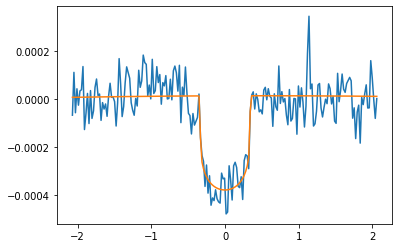

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)
plt.plot(x,y_trans)